Accuracy: 0.8666666666666667


C:\Users\91852\AppData\Local\Temp\ipykernel_17896\3176720142.py:39: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(


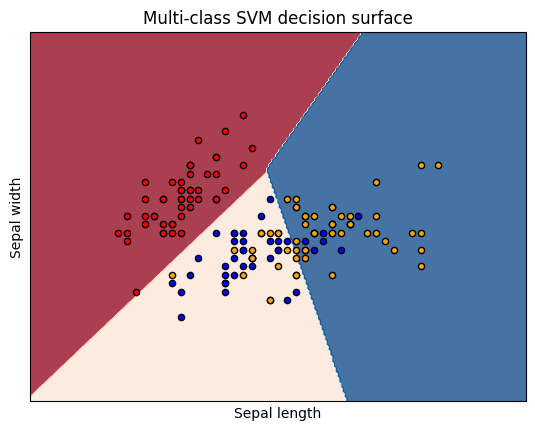

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Load iris dataset from scikit-learn
iris = datasets.load_iris()
X = iris.data[:, :2]  # We only take the first two features for simplicity
y = iris.target

# Define custom colors for each class
colors = ["r", "b", "orange"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Train the multi-class SVM model
clf = SVC(kernel="linear", C=1.0, decision_function_shape="ovr")
clf.fit(X_train, y_train)

# Predict the classes of test data
y_pred = clf.predict(X_test)

# Evaluate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Plot the decision surface
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.RdBu, alpha=0.8)
for i, color in enumerate(colors):
    idx = np.where(y == i)
    plt.scatter(
        X[idx, 0], X[idx, 1], c=color, cmap=plt.cm.RdBu, edgecolor="black", s=20
    )
plt.xlabel("Sepal length")
plt.ylabel("Sepal width")
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.xticks(())
plt.yticks(())
plt.title("Multi-class SVM decision surface")
plt.show()